## Group 7 - Predicting Alcohol sales demand during the Christmas Season using Machine Learning Techniques

### Group Members : 
### Hettige Don Ruwindhu Chandraratne 
### Thimantha Vidanagamage
### Suheet Sonawane
### Samarpan Pandey
### Tirthesh Jani 

### Background 
Supply chain management is a key component in operating any type of business successfully. The alcoholic beverages sales industry accounts for 222.5 billion US Dollars (Statista) and is one of the largest sectors in the sales industry. The importance of maintaining a sufficient inventory of liquor is essential to boost sales of the liquor store. Liquor stores in the state of Iowa, United States generate the highest monthly sales every year during December (Christmas Season). These liquor stores achieve 15 - 20 percent of their annual sales in this period. 
Under such circumstances, Supply Chain Management is crucial to ensure that the supply of liquor meets the demand accordingly. However, due to incorrect Sales predictions for December, the majority of liquor stores within Iowa had not been able to succeed with Supply Chain Management over the years. By the end of the Christmas season (December), the liquor stores might have run out of stock or might have a significant amount of unsold stock. As a result, these liquor stores lose an opportunity to generate sales by running out of stock or possessing a high cost with the remaining stock. In the year 2020, due to the COVID-19 pandemic, alcohol sales rose nearly 13% and caused an imbalance in the demand to supply ratios. (Iowacapitaldispatch,2020)

The reason for this problem is that majority of the liquor stores predict sales for December by calculating the moving sales average for the month over the last 5 years. A monthly predicted sales amount is generated from this calculation. The only aspect that is considered for the calculation is the month and year. Other aspects influencing sales such as day, region, product, and vendor are not considered for this calculation. As a result, there is a drastic difference between the sales predicted and the actual sales. In some situations, actual sales are drastically higher than the predicted sales while in some situations it is drastically lower than the predicted sales.



### Target Audience 

This project is mainly focused on 3 groups of customers
* Liqure Store Owners - The liquor store owners can predict the required stock for the month of December
* Sales Professionals who are involved in Liquor sales industry - The Sales professionals are the intermediators between suppliers and stores, they can benefit my connecting correct supppliers with the stores using sales predictions 
* Suppliers to major Liquor stores - The suppliers can predict their production numbers for the month of December using this product.


### Project Objectives 
During this project, the team was able to identify a couple of key objectives which needs to be achieved to make this project a sucess.They are: 

* Build a predictive model using Hyperopt-Sklearn 
* Predict daily liquor for the month of December in the state of Iowa

### Problem Statement 

Liquor stores in the state of Iowa, United States generate the highest monthly sales every year during December (Christmas Season) which is around 15 - 20 percent of their annual sales. However, due to incorrect Sales predictions which the sales professionals (in stores) calculate by the moving average through the last 5 years, the Supply chain of the majority of liquor stores tends to be disrupted. This is because only year and month are considered as factors for these sales predictions while excluding other essential factors such as product and vendor. Even though these sales professionals do not possess with any technical knowldege related to Aritificial Intelligence, they require a predictive model to predict liquor sales. The objective of this project is to build a predictive model using an AutoML to predict daily liquor sales in December with time series forecasting, as sales professionals in the liquor stores.


### Project Code 


#### Git Hub Link : https://github.com/ruwzeta/alcholsalespredictioniowa

In [1]:
## Importing Necessary Libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm
import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from hpsklearn import HyperoptEstimator
from lightgbm.sklearn import LGBMRegressor
from hpsklearn import any_regressor, random_forest_regression
from hpsklearn import xgboost_regression , svr_sigmoid, knn_regression
from hpsklearn import any_preprocessing
from hyperopt import fmin, tpe, hp, anneal, Trials
from sklearn.model_selection import KFold, cross_val_score
import joblib
import seaborn as sns 

C:\Users\ruwin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\ruwin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


WARN: OMP_NUM_THREADS=None =>
... If you are using openblas if you are using openblas set OMP_NUM_THREADS=1 or risk subprocess calls hanging indefinitely


C:\Users\ruwin\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
# Reading in the full dataset

ILS = pd.read_csv('Iowa_Liquor_Sales.csv')

C:\Users\ruwin\AppData\Local\Temp/ipykernel_5772/622713995.py:3: DtypeWarning: Columns (6,14) have mixed types. Specify dtype option on import or set low_memory=False.
  ILS = pd.read_csv('Iowa_Liquor_Sales.csv')


###  Simple EDA 

In [3]:
ILS.columns

Index(['Invoice/Item Number', 'Date', 'Store Number', 'Store Name', 'Address',
       'City', 'Zip Code', 'Store Location', 'County Number', 'County',
       'Category', 'Category Name', 'Vendor Number', 'Vendor Name',
       'Item Number', 'Item Description', 'Pack', 'Bottle Volume (ml)',
       'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold',
       'Sale (Dollars)', 'Volume Sold (Liters)', 'Volume Sold (Gallons)'],
      dtype='object')

In [4]:
ILS.shape

(19666763, 24)

In [5]:
ILS.head()

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,S24127700024,02/19/2015,3678,"Smoke Shop, The",1918 SE 14TH ST,DES MOINES,50320,POINT (-93.597011 41.570844),77.0,Polk,...,41783,Uv Blue Raspberry Vodka Mini,6,500,4.89,7.34,2,14.68,1.0,0.26
1,S15066200002,10/10/2013,2633,Hy-Vee #3 / BDI / Des Moines,3221 SE 14TH ST,DES MOINES,50320,POINT (-93.596754 41.554101),77.0,Polk,...,904969,Sabe Premiom Sake Double Barrel,6,750,14.99,22.49,6,134.94,4.5,1.19
2,S19323500030,06/03/2014,2607,Hy-Vee Wine and Spirits / Shenandoah,520 SO FREMONT,SHENANDOAH,51601,POINT (-95.385111 40.761736),73.0,Page,...,45277,Paramount White Rum,12,1000,4.34,6.51,12,78.12,12.0,3.17
3,S23334500013,01/06/2015,4810,Kum & Go #518 / Ankeny,3603 NE OTTERVIEW CIRCLE,ANKENY,50021,POINT (-93.572458 41.760989),77.0,Polk,...,43121,Bacardi Superior Rum Mini,12,500,5.54,8.31,1,8.31,0.5,0.13
4,S09742200010,12/27/2012,4025,Karam Kaur Khasriya Llc,702 13TH ST,BELLE PLAINE,52208,POINT (-92.277759 41.897052),6.0,Benton,...,11298,Crown Royal Canadian Whisky,6,1750,31.00,46.49,2,92.98,3.5,0.92


In [6]:
ILS.dtypes

Invoice/Item Number       object
Date                      object
Store Number               int64
Store Name                object
Address                   object
City                      object
Zip Code                  object
Store Location            object
County Number            float64
County                    object
Category                 float64
Category Name             object
Vendor Number            float64
Vendor Name               object
Item Number               object
Item Description          object
Pack                       int64
Bottle Volume (ml)         int64
State Bottle Cost        float64
State Bottle Retail      float64
Bottles Sold               int64
Sale (Dollars)           float64
Volume Sold (Liters)     float64
Volume Sold (Gallons)    float64
dtype: object

In [7]:
#Convert Date to Date Format
ILS['Date'] = pd.to_datetime(ILS['Date'])
#Create new column with Month value 
ILS['Month']=  ILS['Date'].dt.month
## Filter dataset to take only records for the month of December
ILS_monthly = ILS.loc[ILS['Month'] == 12]
#To check null values 
ILS_monthly.isnull().sum()

Invoice/Item Number           0
Date                          0
Store Number                  0
Store Name                    0
Address                    9149
City                       9149
Zip Code                   9149
Store Location           170176
County Number              9844
County                     9844
Category                   1829
Category Name              2129
Vendor Number                 0
Vendor Name                   0
Item Number                   0
Item Description              0
Pack                          0
Bottle Volume (ml)            0
State Bottle Cost             0
State Bottle Retail           0
Bottles Sold                  0
Sale (Dollars)                0
Volume Sold (Liters)          0
Volume Sold (Gallons)         0
Month                         0
dtype: int64

In [8]:
#Dropping null values in the coloumn County
ILS_monthly= ILS_monthly.dropna(subset=['County'])
# Dropping null values in the Store Location
ILS_monthly= ILS_monthly.dropna(subset=['Store Location'])
#Checking shape of the Dataset
ILS_monthly.shape

(1602032, 25)

In [9]:
# Counties with most sales
ILS_monthly['County'].value_counts()[:15].index.tolist()
# Convert County values to lower case 
ILS_monthly['County']= ILS_monthly['County'].str.lower()

In [10]:
# Select duplicate rows except first occurrence based on County and Store Number columns
ILS_cleaned = ILS_monthly[ILS_monthly.duplicated('County', keep = 'first')]
ILS_cleaned = ILS_monthly[ILS_monthly.duplicated('Store Number', keep = 'first')]
ILS_cleaned.shape

(1600031, 25)

In [11]:
ILS_cleaned.head(10)

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Month
134,S09547600170,2012-12-18,2616,Hy-Vee Food and Drug / Clinton,901 SOUTH 4TH ST,CLINTON,52732,POINT (-90.193204 41.836268000000004),23.0,clinton,...,Paramount White Rum,12,750,3.85,5.77,12,69.24,9.0,2.38,12
304,S09547600045,2012-12-18,2616,Hy-Vee Food and Drug / Clinton,901 SOUTH 4TH ST,CLINTON,52732,POINT (-90.193204 41.836268000000004),23.0,clinton,...,Uv Ivory (vanilla) Vodka,12,750,6.25,9.49,12,113.88,9.0,2.38,12
357,S23198700061,2014-12-26,2590,Hy-Vee Food Store #5 / Cedar Rapids,3235 OAKLAND ROAD NE,CEDAR RAPIDS,52402,POINT (-91.658105 42.010971),57.0,linn,...,Phillips Vodka Ez Pack,12,750,3.57,5.36,12,64.32,9.0,2.38,12
889,S09279900051,2012-12-04,2616,Hy-Vee Food and Drug / Clinton,901 SOUTH 4TH ST,CLINTON,52732,POINT (-90.193204 41.836268000000004),23.0,clinton,...,Evan Williams Honey,12,750,7.94,11.91,12,142.92,9.0,2.38,12
1094,S22969700037,2014-12-16,2353,Cresco Liquor Store,708 2ND AVE SE,CRESCO,52136,POINT (-92.106529 43.371131),45.0,howard,...,2 Gingers,12,750,12.07,18.11,2,36.22,1.5,0.40,12
1146,S16551300083,2013-12-27,2633,Hy-Vee #3 / BDI / Des Moines,3221 SE 14TH ST,DES MOINES,50320,POINT (-93.596754 41.554101),77.0,polk,...,Fireball Cinnamon Whiskey,6,1750,15.33,23.00,360,8280.00,630.0,166.43,12
1162,S22735700015,2014-12-03,4349,Southside Food Mart,1101 ARMY POST RD,DES MOINES,50315,POINT (-93.628783 41.526511),77.0,polk,...,Hennessy VS,24,200,5.49,8.24,24,197.76,4.8,1.27,12
1169,S22748700224,2014-12-04,2616,Hy-Vee Food and Drug / Clinton,901 SOUTH 4TH ST,CLINTON,52732,POINT (-90.193204 41.836268000000004),23.0,clinton,...,Bowmore 12 Yr Single Malt Scotch,6,750,24.91,37.37,2,74.74,1.5,0.40,12
1363,S23188200088,2014-12-26,2647,Hy-Vee #7 / Cedar Rapids,5050 EDGEWOOD RD,CEDAR RAPIDS,52411,POINT (-91.701581 42.030129),57.0,linn,...,Seagrams 7 Crown Bl Whiskey,6,1750,11.96,17.94,6,107.64,10.5,2.77,12
1459,S09293400128,2012-12-04,2613,Hy-Vee Food Store #1 / Council Bluff,2323 W BROADWAY,COUNCIL BLUFFS,51501,POINT (-95.879662 41.261925),78.0,pottawattamie,...,Hawkeye Vodka 80 Prf Mini,12,500,3.73,5.59,1,5.59,0.5,0.13,12


C:\Users\ruwin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Bottles Sold', ylabel='count'>

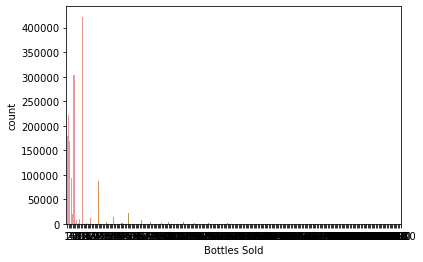

In [12]:
# Count plot for the Bottles Sold
sb.countplot(ILS_cleaned['Bottles Sold'],)

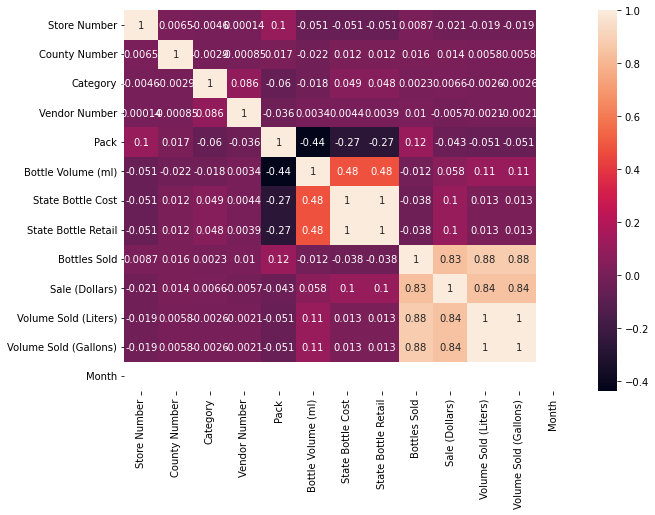

In [13]:
#Performing Correlarion matrix to see what all features affect on the outcome
fig , ax = plt.subplots(figsize = (10,7))
sb.heatmap(ILS_cleaned.corr() , annot = True , ax = ax)
plt.show()

array([[<AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'Store Number'}>,
        <AxesSubplot:title={'center':'County Number'}>,
        <AxesSubplot:title={'center':'Category'}>],
       [<AxesSubplot:title={'center':'Vendor Number'}>,
        <AxesSubplot:title={'center':'Pack'}>,
        <AxesSubplot:title={'center':'Bottle Volume (ml)'}>,
        <AxesSubplot:title={'center':'State Bottle Cost'}>],
       [<AxesSubplot:title={'center':'State Bottle Retail'}>,
        <AxesSubplot:title={'center':'Bottles Sold'}>,
        <AxesSubplot:title={'center':'Sale (Dollars)'}>,
        <AxesSubplot:title={'center':'Volume Sold (Liters)'}>],
       [<AxesSubplot:title={'center':'Volume Sold (Gallons)'}>,
        <AxesSubplot:title={'center':'Month'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

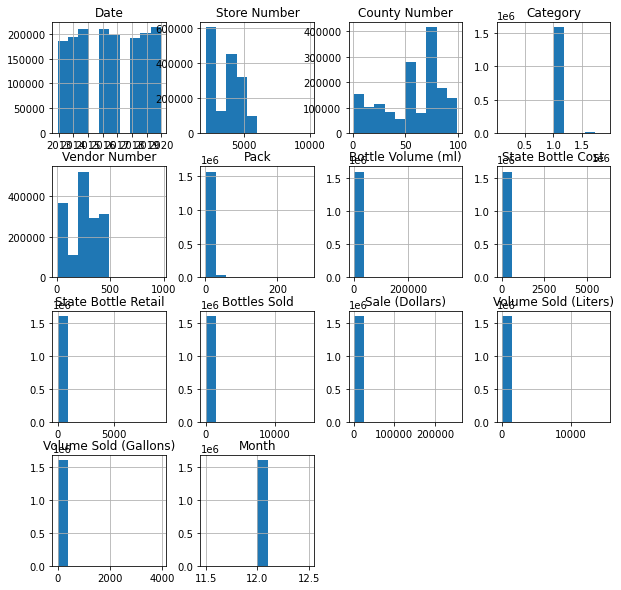

In [14]:
## Hist Plot for dataset

ILS_cleaned.hist(figsize=(10,10))

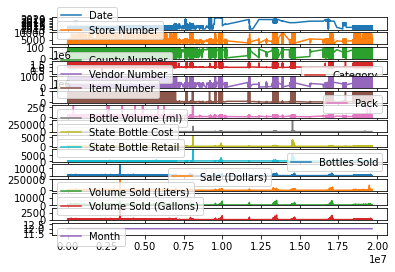

In [15]:
# Cleaned Plot for numeric Variables
ILS_cleaned.plot(subplots=True)

plt.show()

In [16]:
ILS2 = ILS.copy()
ILS2 = ILS2.drop(columns = ['Invoice/Item Number','Store Number', 'Store Name', 'Address', 'City', 'Zip Code', 'Store Location', 'County Number', 'County','Category', 'Category Name', 'Vendor Number', 'Item Number', 'Pack', 'Bottle Volume (ml)', 'State Bottle Cost', 'State Bottle Retail', 'Volume Sold (Liters)', 'Volume Sold (Gallons)'])
ILS2

,Date,Vendor Name,Item Description,Bottles Sold,Sale (Dollars),Month
0,2015-02-19,Phillips Beverage Company,Uv Blue Raspberry Vodka Mini,2,14.68,2
1,2013-10-10,MHW Ltd,Sabe Premiom Sake Double Barrel,6,134.94,10
2,2014-06-03,Luxco-St Louis,Paramount White Rum,12,78.12,6
3,2015-01-06,"Bacardi U.S.A., Inc.",Bacardi Superior Rum Mini,1,8.31,1
4,2012-12-27,Diageo Americas,Crown Royal Canadian Whisky,2,92.98,12
...,...,...,...,...,...,...
19666758,2013-02-13,"Sazerac Co., Inc.",Ice Box Mudslide,6,54.78,2
19666759,2015-01-21,"Sazerac Co., Inc.",Fireball Cinnamon Whiskey,4,20.00,1
19666760,2015-11-24,Phillips Beverage Company,Uv Vodka,12,117.00,11
19666761,2012-04-05,"Bacardi U.S.A., Inc.",Bacardi Superior Rum,6,132.00,4


In [17]:
ILS2['Sale (Dollars)'] = ILS2['Sale (Dollars)'].astype(str).str.replace('$', ' ').astype(float)
ILS2

C:\Users\ruwin\AppData\Local\Temp/ipykernel_5772/2775448255.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ILS2['Sale (Dollars)'] = ILS2['Sale (Dollars)'].astype(str).str.replace('$', ' ').astype(float)


,Date,Vendor Name,Item Description,Bottles Sold,Sale (Dollars),Month
0,2015-02-19,Phillips Beverage Company,Uv Blue Raspberry Vodka Mini,2,14.68,2
1,2013-10-10,MHW Ltd,Sabe Premiom Sake Double Barrel,6,134.94,10
2,2014-06-03,Luxco-St Louis,Paramount White Rum,12,78.12,6
3,2015-01-06,"Bacardi U.S.A., Inc.",Bacardi Superior Rum Mini,1,8.31,1
4,2012-12-27,Diageo Americas,Crown Royal Canadian Whisky,2,92.98,12
...,...,...,...,...,...,...
19666758,2013-02-13,"Sazerac Co., Inc.",Ice Box Mudslide,6,54.78,2
19666759,2015-01-21,"Sazerac Co., Inc.",Fireball Cinnamon Whiskey,4,20.00,1
19666760,2015-11-24,Phillips Beverage Company,Uv Vodka,12,117.00,11
19666761,2012-04-05,"Bacardi U.S.A., Inc.",Bacardi Superior Rum,6,132.00,4


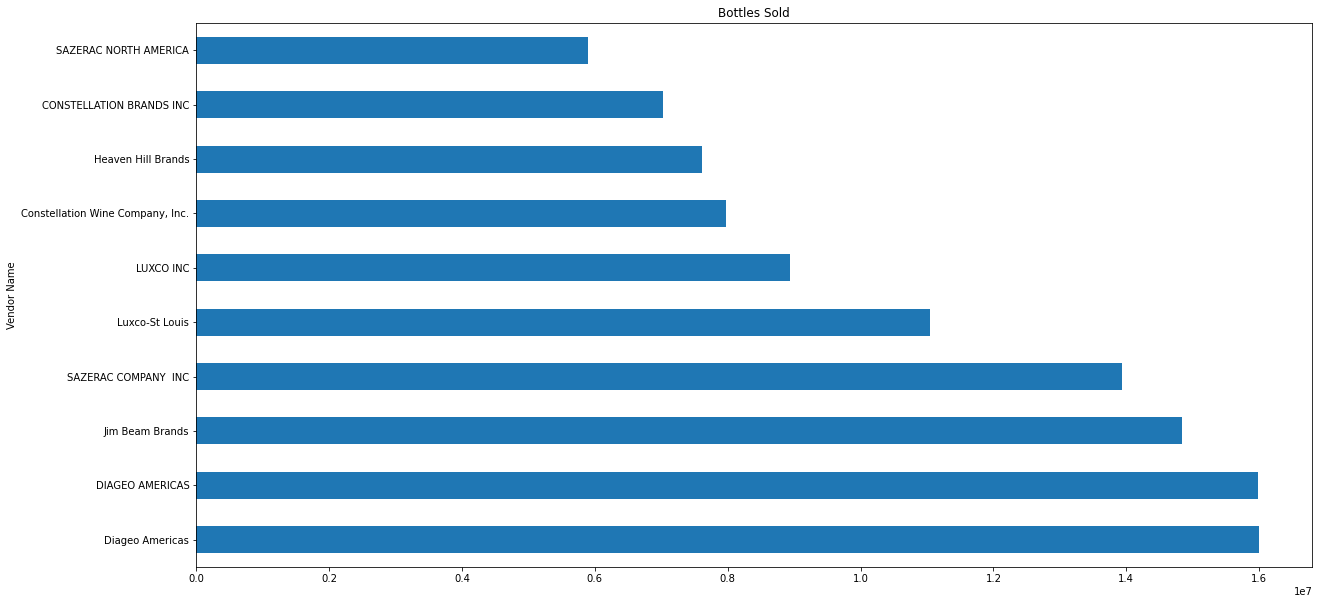

In [18]:
ILS2.groupby('Vendor Name')['Bottles Sold'].sum().sort_values(ascending=False).head(10).plot(kind='barh', figsize=(20,10))
plt.title('Bottles Sold')
plt.show()

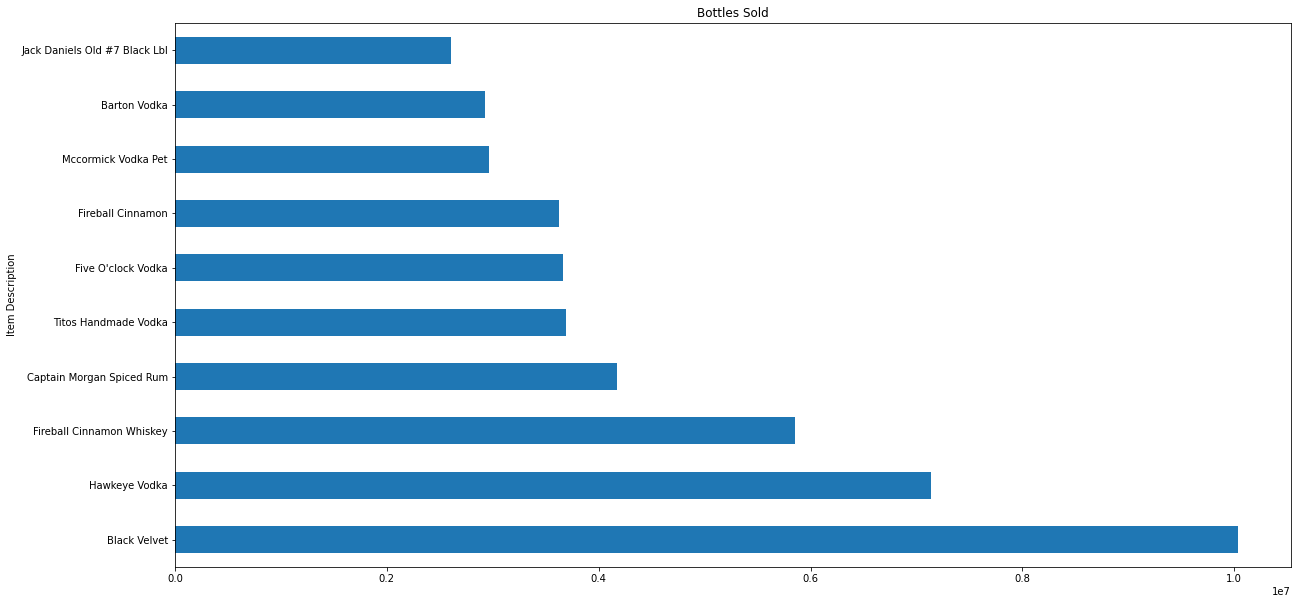

In [19]:
ILS2.groupby('Item Description')['Bottles Sold'].sum().sort_values(ascending=False).head(10).plot(kind='barh', figsize=(20,10))
plt.title('Bottles Sold')
plt.show()

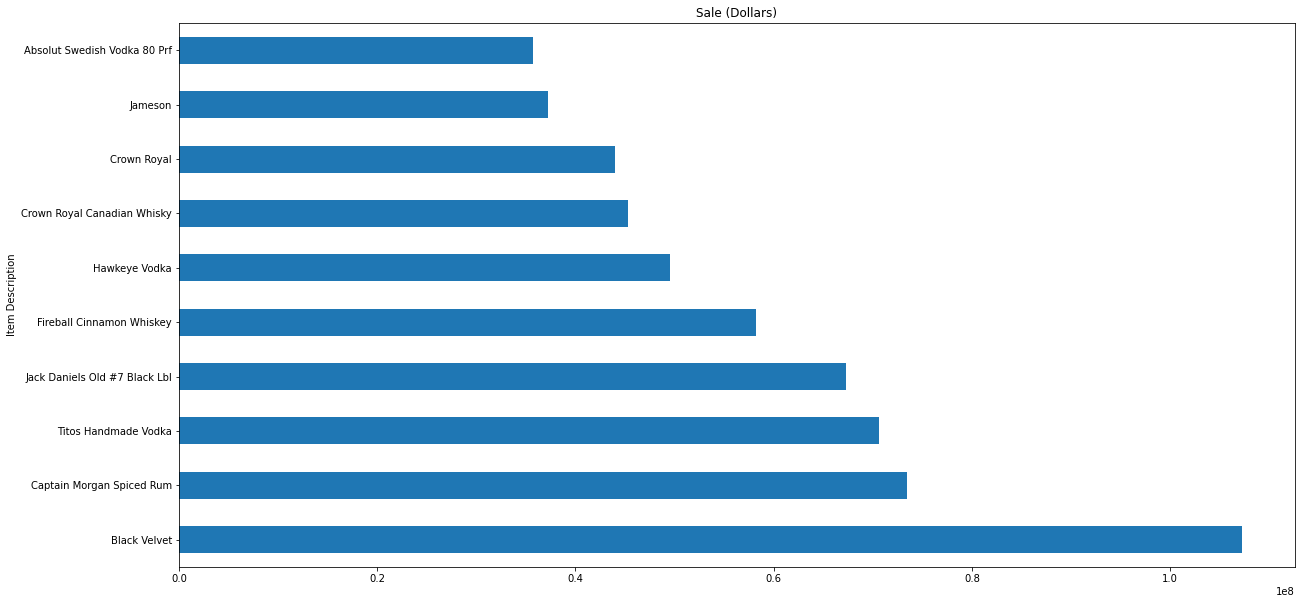

In [20]:
ILS2.groupby('Item Description')['Sale (Dollars)'].sum().sort_values(ascending=False).head(10).plot(kind='barh', figsize=(20,10))
plt.title('Sale (Dollars)')
plt.show()

In [21]:
ILS_cleaned['Invoice/Item Number'] = ILS_cleaned['Invoice/Item Number'].str.replace(r'\D', '')
ILS_cleaned['Zip Code'] = ILS_cleaned['Zip Code'].str.replace(r'-', '')

C:\Users\ruwin\AppData\Local\Temp/ipykernel_5772/1650728067.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  ILS_cleaned['Invoice/Item Number'] = ILS_cleaned['Invoice/Item Number'].str.replace(r'\D', '')
C:\Users\ruwin\AppData\Local\Temp/ipykernel_5772/1650728067.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ILS_cleaned['Invoice/Item Number'] = ILS_cleaned['Invoice/Item Number'].str.replace(r'\D', '')
C:\Users\ruwin\AppData\Local\Temp/ipykernel_5772/1650728067.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [22]:
## Here we cleaned a few unwanted features from the datatset.

# ILS_cleaned.drop("Date", axis=1,inplace= True)
ILS_cleaned["Bottles_Sold"] = ILS_cleaned["Bottles Sold"]
ILS_cleaned.drop("Bottles Sold", axis=1)
ILS_cleaned.drop(ILS_cleaned.columns.difference(['Invoice/Item Number','Store Number','Zip Code','County Number', 'Bottles_Sold','Volume Sold (Liters)']), 1, inplace=True)
ILS_cleaned.dropna(inplace=True)
X = ILS_cleaned.drop("Bottles_Sold", axis=1)
y = ILS_cleaned.Bottles_Sold

C:\Users\ruwin\AppData\Local\Temp/ipykernel_5772/1133774373.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ILS_cleaned["Bottles_Sold"] = ILS_cleaned["Bottles Sold"]
C:\Users\ruwin\AppData\Local\Temp/ipykernel_5772/1133774373.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  ILS_cleaned.drop(ILS_cleaned.columns.difference(['Invoice/Item Number','Store Number','Zip Code','County Number', 'Bottles_Sold','Volume Sold (Liters)']), 1, inplace=True)
C:\Users\ruwin\AppData\Local\Temp/ipykernel_5772/1133774373.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pyd

In [23]:
# The datasset is spilt into training and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [24]:
#Defining Random Forest Regressor Model

model = HyperoptEstimator(
    regressor=random_forest_regression('reg')
    , preprocessing=any_preprocessing('pre')
    , algo=tpe.suggest
    , max_evals=50
    , trial_timeout=300
) 

In [25]:
#perform the search
model.fit(X_train.values, y_train.values)

100%|██████████| 50/50 [00:30<00:00, 30.79s/trial, best loss: 0.4792972210626698]


C:\Users\ruwin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


In [26]:
# Print R2 value
print(model.score(X_test, y_test))

-51.855482324244385


In [27]:
#Identify Best Hyperparameters 
print(model.best_model())

{'learner': RandomForestRegressor(bootstrap=False, criterion='mse', max_features=None,
                      n_estimators=68, n_jobs=1, random_state=4, verbose=False), 'preprocs': (MinMaxScaler(feature_range=(-1.0, 1.0)),), 'ex_preprocs': ()}


In [29]:
# Dump to PKL file 
joblib.dump(model, 'RF_model.pkl')

['RF_model.pkl']

In [30]:
# Create XGBoost Model
estim = HyperoptEstimator(regressor=xgboost_regression('xgreg'),
                          preprocessing=any_preprocessing('pre'),
                          algo=tpe.suggest,
                          max_evals=50,
                          trial_timeout=300)




In [31]:
estim.fit(X_train.values, y_train.values)

100%|██████████| 50/50 [04:57<00:00, 297.67s/trial, best loss: 0.4817495698839831]
[03:41:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


In [32]:
print(estim.score(X_test, y_test))

0.9024392409722292


In [33]:
## Best hyperparameters
print(estim.best_model())

{'learner': XGBRegressor(base_score=0.5, booster='gbtree',
             colsample_bylevel=0.6108749864742665, colsample_bynode=1,
             colsample_bytree=0.5125857952350454, enable_categorical=False,
             gamma=0.015177105956199704, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1393110385884146,
             max_delta_step=0, max_depth=9, min_child_weight=2, missing=nan,
             monotone_constraints='()', n_estimators=2000, n_jobs=16,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=1, reg_alpha=0.0011669673381968124,
             reg_lambda=2.67696635086539, scale_pos_weight=1, seed=1,
             subsample=0.7393979571256765, tree_method='exact',
             validate_parameters=1, verbosity=None), 'preprocs': (), 'ex_preprocs': ()}


In [34]:
joblib.dump(estim, 'XGB_model.pkl')

['XGB_model.pkl']

In [44]:
# Creating KNN Model
from sklearn.metrics import mean_absolute_error
knnmodel = HyperoptEstimator(regressor=knn_regression('knnreg'),
                          preprocessing=any_preprocessing('my_pre'),
                          algo=tpe.suggest,
                          max_evals=50,
                          trial_timeout=300,
                          loss_fn=mean_absolute_error)


In [45]:
knnmodel.fit(X_train.values, y_train.values)

100%|██████████| 50/50 [00:07<00:00,  7.50s/trial, best loss: 1.4696775631539318]


In [46]:
print(knnmodel.score(X_test, y_test))

-0.6371758367775693


In [47]:
print(knnmodel.best_model())

{'learner': KNeighborsRegressor(metric='manhattan', n_jobs=1, n_neighbors=2, p=1,
                    weights='distance'), 'preprocs': (PCA(n_components=5, whiten=True),), 'ex_preprocs': ()}


In [48]:
joblib.dump(knnmodel, 'KNN_model.pkl')

['KNN_model.pkl']

In [62]:
knn_y_predict = knnmodel.predict(X_test)
xgb_y_predict = estim.predict(X_test)
rfr_y_predicts =  model.predict(X_test)

In [79]:
# Regression Metrics 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


errors = mean_squared_error(y_test, knn_y_predict, squared=False)
r2 = r2_score(y_test,knn_y_predict)
# report error
print('MSE :',errors)
print("RMSE :",np.sqrt(mean_squared_error(y_test,knn_y_predict)))
print('R2 :',r2)

MSE : 30.234510221094833
RMSE : 30.234510221094833
R2 : -0.6371758367775693


In [80]:
errors = mean_squared_error(y_test,xgb_y_predict , squared=False)
r2 = r2_score(y_test,xgb_y_predict)
# report error
print('MSE :',errors)
print("RMSE :",np.sqrt(mean_squared_error(y_test,xgb_y_predict)))
print('R2 :',r2)

MSE : 7.380620239832052
RMSE : 7.380620239832052
R2 : 0.9024392409722292


In [81]:
errors = mean_squared_error(y_test,rfr_y_predicts , squared=False)
r2 = r2_score(y_test,rfr_y_predicts)
# report error
print('MSE :',errors)
print("RMSE :",np.sqrt(mean_squared_error(y_test,rfr_y_predicts)))
print('R2 :',r2)

MSE : 171.7909553023628
RMSE : 171.7909553023628
R2 : -51.855482324244385


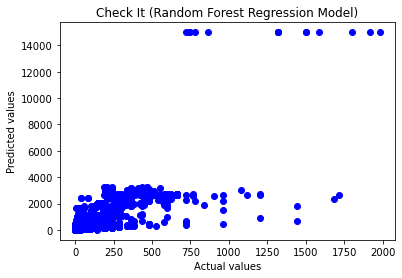

In [86]:
## Visualizing Predicted vs Actual Values
plt.scatter(y_test, rfr_y_predicts, color = 'blue')
plt.title('Check It (Random Forest Regression Model)')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

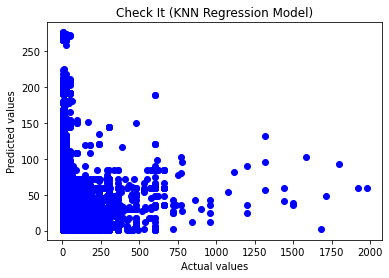

In [87]:
plt.scatter(y_test, knn_y_predict, color = 'blue')
plt.title('Check It (KNN Regression Model)')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

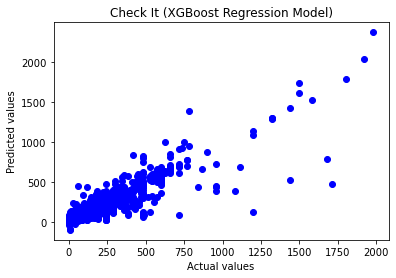

In [88]:
plt.scatter(y_test, xgb_y_predict, color = 'blue')
plt.title('Check It (XGBoost Regression Model)')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

<AxesSubplot:xlabel='County Number'>

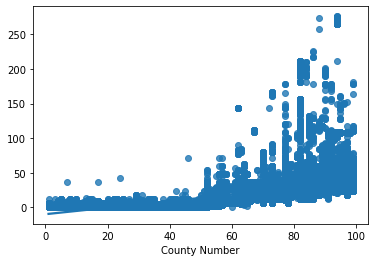

In [93]:
### Visualze Sales Predictions for Different Counties
sns.regplot(x=X_test['County Number'], y=knn_y_predict)

<AxesSubplot:xlabel='County Number'>

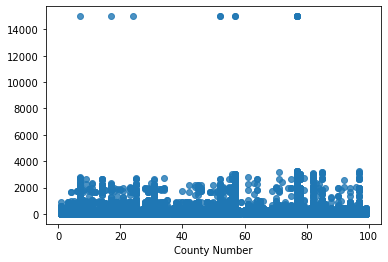

In [94]:
sns.regplot(x=X_test['County Number'], y=rfr_y_predicts)

# Future work performeed: reducing dataset as it was taking too long for model build in HyperOpt Estimator.

##### Checking distinct values to remove all other rows where County is not 'polk' in state of Iowa 

In [ ]:
ILS_cleaned['County'].unique()

array(['clinton', 'linn', 'howard', 'polk', 'pottawattamie', 'poweshiek',
       'scott', 'johnson', 'dubuque', 'warren', 'kossuth', 'cerro gordo',
       'story', 'palo alto', 'bremer', 'jasper', 'monona', 'iowa',
       'wapello', 'hancock', 'franklin', "o'brien", 'allamakee', 'lee',
       'woodbury', 'black hawk', 'boone', 'louisa', 'muscatine', 'page',
       'jefferson', 'davis', 'buchanan', 'marshall', 'ida', 'buena vista',
       'jones', 'dallas', 'jackson', 'clay', 'marion', 'washington',
       'clayton', 'floyd', 'tama', 'carroll', 'plymouth', 'webster',
       'harrison', 'cass', 'crawford', 'sac', 'hardin', 'winnebago',
       'des moines', 'clarke', 'winneshiek', 'sioux', 'mahaska', 'union',
       'benton', 'hamilton', 'dickinson', 'shelby', 'mitchell', 'greene',
       'adair', 'monroe', 'pocahontas', 'wright', 'lyon', 'van buren',
       'mills', 'appanoose', 'delaware', 'worth', 'montgomery', 'fayette',
       'emmet', 'humboldt', 'henry', 'osceola', 'audubon', 'keok

##### Removing rows where County is not 'polk' in state of Iowa

In [ ]:
ILS_cleaned = ILS_cleaned[ILS_cleaned.County == 'polk']

In [ ]:
ILS_cleaned.head(10)

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Month
1146,S16551300083,2013-12-27,2633,Hy-Vee #3 / BDI / Des Moines,3221 SE 14TH ST,DES MOINES,50320,POINT (-93.596754 41.554101),77.0,polk,...,Fireball Cinnamon Whiskey,6,1750,15.33,23.00,360,8280.00,630.00,166.43,12
1162,S22735700015,2014-12-03,4349,Southside Food Mart,1101 ARMY POST RD,DES MOINES,50315,POINT (-93.628783 41.526511),77.0,polk,...,Hennessy VS,24,200,5.49,8.24,24,197.76,4.80,1.27,12
1608,S22659100043,2014-12-01,2532,Hy-Vee Food Store #2 / Des Moines,2540 E EUCLID,DES MOINES,50317,POINT (-93.569452 41.627838),77.0,polk,...,Wild Turkey American Honey,12,750,10.50,15.75,12,189.00,9.00,2.38,12
1905,S23184600060,2014-12-26,4344,Spirits / Grimes,109 EAST 1ST ST STE B,GRIMES,50111,POINT (-93.793827 41.68840000000001),77.0,polk,...,Popov Vodka 80 Prf,12,750,4.50,6.75,1,6.75,0.75,0.20,12
2216,S23184600073,2014-12-26,4344,Spirits / Grimes,109 EAST 1ST ST STE B,GRIMES,50111,POINT (-93.793827 41.68840000000001),77.0,polk,...,Christian Bros Brandy,24,375,3.23,4.85,1,4.85,0.38,0.10,12
2269,S23272500015,2014-12-30,4829,Central City 2,1501 MICHIGAN AVE,DES MOINES,50314,POINT (-93.613739 41.60572),77.0,polk,...,Ten High,12,1000,4.94,7.41,84,622.44,84.00,22.19,12
2378,S22816800033,2014-12-08,2648,Hy-Vee #4 / WDM,555 S 51ST ST,WEST DES MOINES,50265,POINT (-93.773557 41.561197),77.0,polk,...,Tanqueray Gin,12,1000,15.25,22.88,12,274.56,12.00,3.17,12
2686,S16489700015,2013-12-26,2587,Hy-Vee Food Store / Johnston,5750 MERLE HAY ROAD,JOHNSTON,50131,POINT (-93.697731 41.665172),77.0,polk,...,Cedar Ridge Bourbon,6,750,17.60,26.40,6,158.40,4.50,1.19,12
2712,S16065900019,2013-12-03,4939,Urban Liquor,6401 DOUGLAS AVE STE 1,URBANDALE,50322,POINT (-93.705732 41.629411),77.0,polk,...,Absolut Mandrin,12,750,11.49,17.24,2,34.48,1.50,0.40,12
3080,S22745000041,2014-12-04,2963,Dahl's / Clive,15500 HICKMAN,CLIVE,50325,POINT (-93.831913 41.614713),77.0,polk,...,Di Amore Amaretto,12,750,6.00,9.00,3,27.00,2.25,0.59,12


C:\Users\samar\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Bottles Sold', ylabel='count'>

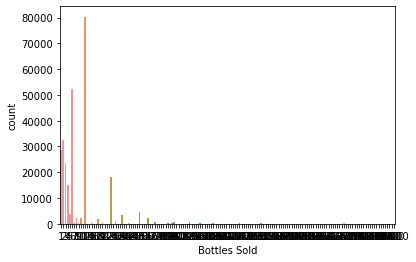

In [ ]:
# Count plot for the Bottles Sold
sb.countplot(ILS_cleaned['Bottles Sold'],)

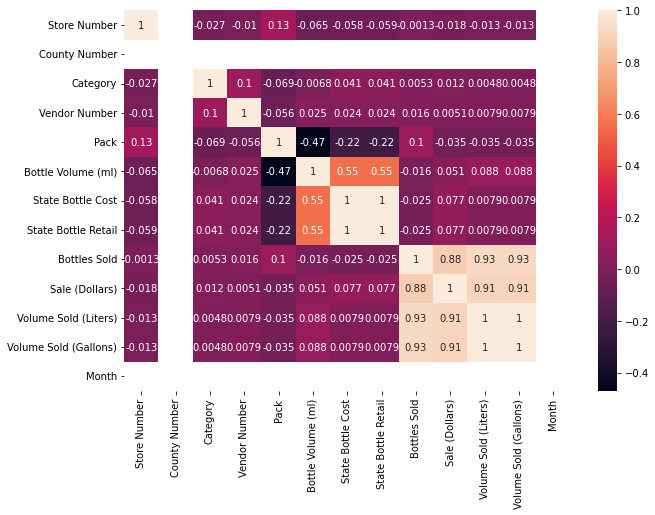

In [ ]:
#Performing Correlarion matrix to see what all features affect on the outcome
fig , ax = plt.subplots(figsize = (10,7))
sb.heatmap(ILS_cleaned.corr() , annot = True , ax = ax)
plt.show()

array([[<AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'Store Number'}>,
        <AxesSubplot:title={'center':'County Number'}>,
        <AxesSubplot:title={'center':'Category'}>],
       [<AxesSubplot:title={'center':'Vendor Number'}>,
        <AxesSubplot:title={'center':'Pack'}>,
        <AxesSubplot:title={'center':'Bottle Volume (ml)'}>,
        <AxesSubplot:title={'center':'State Bottle Cost'}>],
       [<AxesSubplot:title={'center':'State Bottle Retail'}>,
        <AxesSubplot:title={'center':'Bottles Sold'}>,
        <AxesSubplot:title={'center':'Sale (Dollars)'}>,
        <AxesSubplot:title={'center':'Volume Sold (Liters)'}>],
       [<AxesSubplot:title={'center':'Volume Sold (Gallons)'}>,
        <AxesSubplot:title={'center':'Month'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

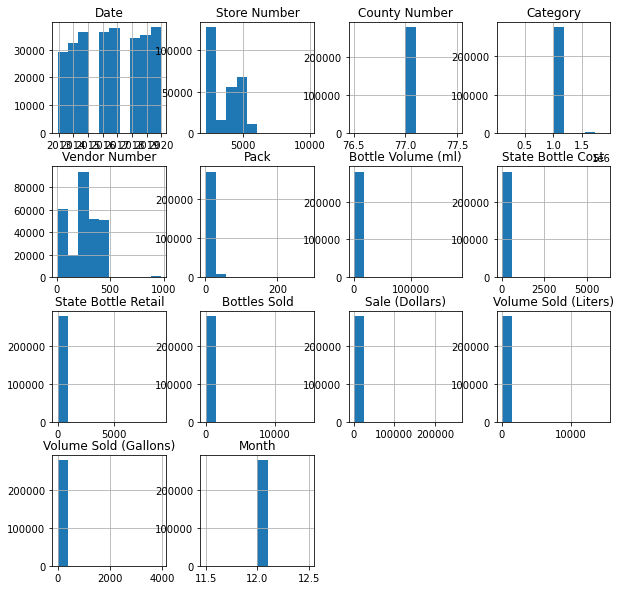

In [ ]:
## Hist Plot for dataset

ILS_cleaned.hist(figsize=(10,10))

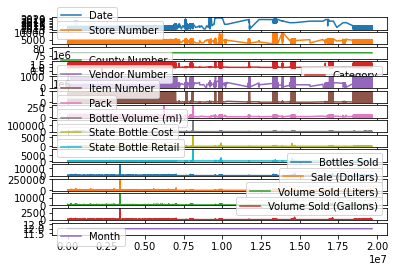

In [ ]:
# Cleaned Plot for numeric Variables
ILS_cleaned.plot(subplots=True)

plt.show()

In [ ]:
ILS2 = ILS.copy()
ILS2 = ILS2.drop(columns = ['Invoice/Item Number','Store Number', 'Store Name', 'Address', 'City', 'Zip Code', 'Store Location', 'County Number', 'County','Category', 'Category Name', 'Vendor Number', 'Item Number', 'Pack', 'Bottle Volume (ml)', 'State Bottle Cost', 'State Bottle Retail', 'Volume Sold (Liters)', 'Volume Sold (Gallons)'])
ILS2

,Date,Vendor Name,Item Description,Bottles Sold,Sale (Dollars),Month
0,2015-02-19,Phillips Beverage Company,Uv Blue Raspberry Vodka Mini,2,14.68,2
1,2013-10-10,MHW Ltd,Sabe Premiom Sake Double Barrel,6,134.94,10
2,2014-06-03,Luxco-St Louis,Paramount White Rum,12,78.12,6
3,2015-01-06,"Bacardi U.S.A., Inc.",Bacardi Superior Rum Mini,1,8.31,1
4,2012-12-27,Diageo Americas,Crown Royal Canadian Whisky,2,92.98,12
...,...,...,...,...,...,...
19666758,2013-02-13,"Sazerac Co., Inc.",Ice Box Mudslide,6,54.78,2
19666759,2015-01-21,"Sazerac Co., Inc.",Fireball Cinnamon Whiskey,4,20.00,1
19666760,2015-11-24,Phillips Beverage Company,Uv Vodka,12,117.00,11
19666761,2012-04-05,"Bacardi U.S.A., Inc.",Bacardi Superior Rum,6,132.00,4


In [ ]:
ILS2['Sale (Dollars)'] = ILS2['Sale (Dollars)'].astype(str).str.replace('$', ' ').astype(float)
ILS2

C:\Users\samar\AppData\Local\Temp/ipykernel_11600/2775448255.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ILS2['Sale (Dollars)'] = ILS2['Sale (Dollars)'].astype(str).str.replace('$', ' ').astype(float)


,Date,Vendor Name,Item Description,Bottles Sold,Sale (Dollars),Month
0,2015-02-19,Phillips Beverage Company,Uv Blue Raspberry Vodka Mini,2,14.68,2
1,2013-10-10,MHW Ltd,Sabe Premiom Sake Double Barrel,6,134.94,10
2,2014-06-03,Luxco-St Louis,Paramount White Rum,12,78.12,6
3,2015-01-06,"Bacardi U.S.A., Inc.",Bacardi Superior Rum Mini,1,8.31,1
4,2012-12-27,Diageo Americas,Crown Royal Canadian Whisky,2,92.98,12
...,...,...,...,...,...,...
19666758,2013-02-13,"Sazerac Co., Inc.",Ice Box Mudslide,6,54.78,2
19666759,2015-01-21,"Sazerac Co., Inc.",Fireball Cinnamon Whiskey,4,20.00,1
19666760,2015-11-24,Phillips Beverage Company,Uv Vodka,12,117.00,11
19666761,2012-04-05,"Bacardi U.S.A., Inc.",Bacardi Superior Rum,6,132.00,4


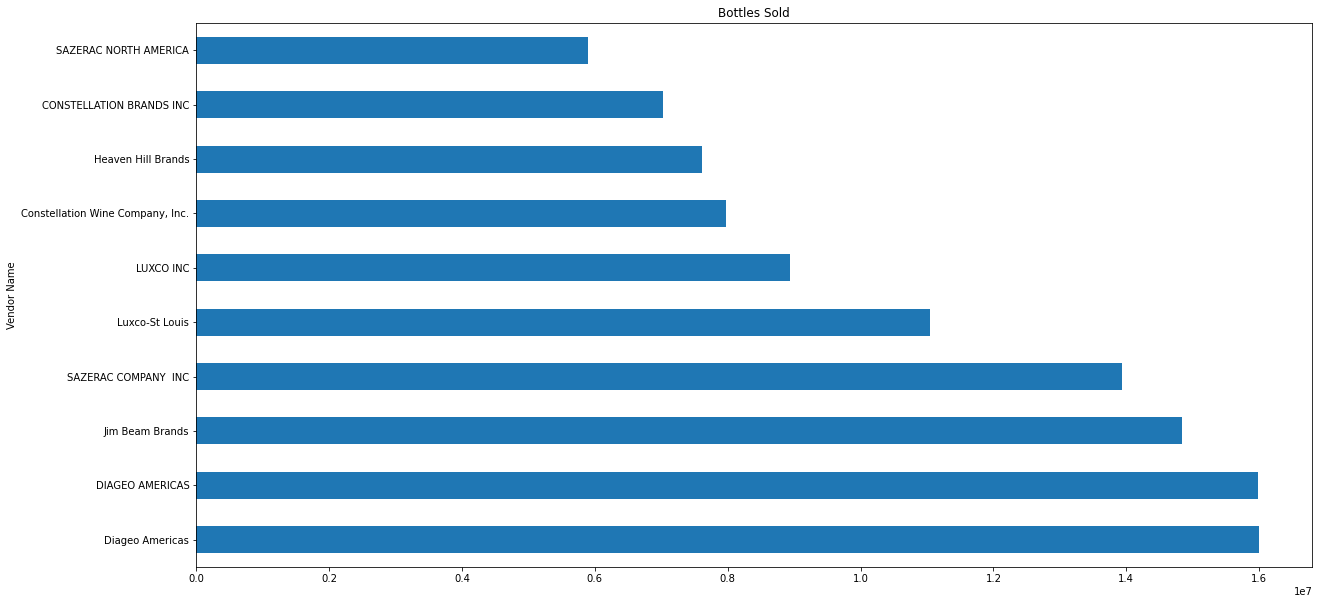

In [ ]:
ILS2.groupby('Vendor Name')['Bottles Sold'].sum().sort_values(ascending=False).head(10).plot(kind='barh', figsize=(20,10))
plt.title('Bottles Sold')
plt.show()

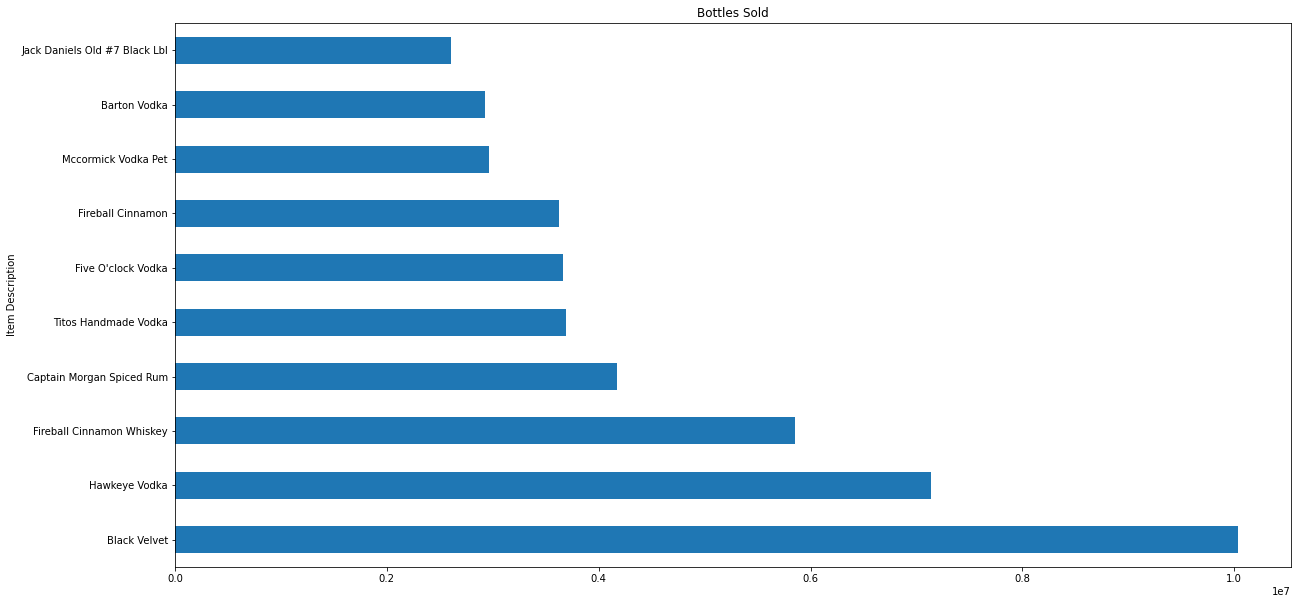

In [ ]:
ILS2.groupby('Item Description')['Bottles Sold'].sum().sort_values(ascending=False).head(10).plot(kind='barh', figsize=(20,10))
plt.title('Bottles Sold')
plt.show()

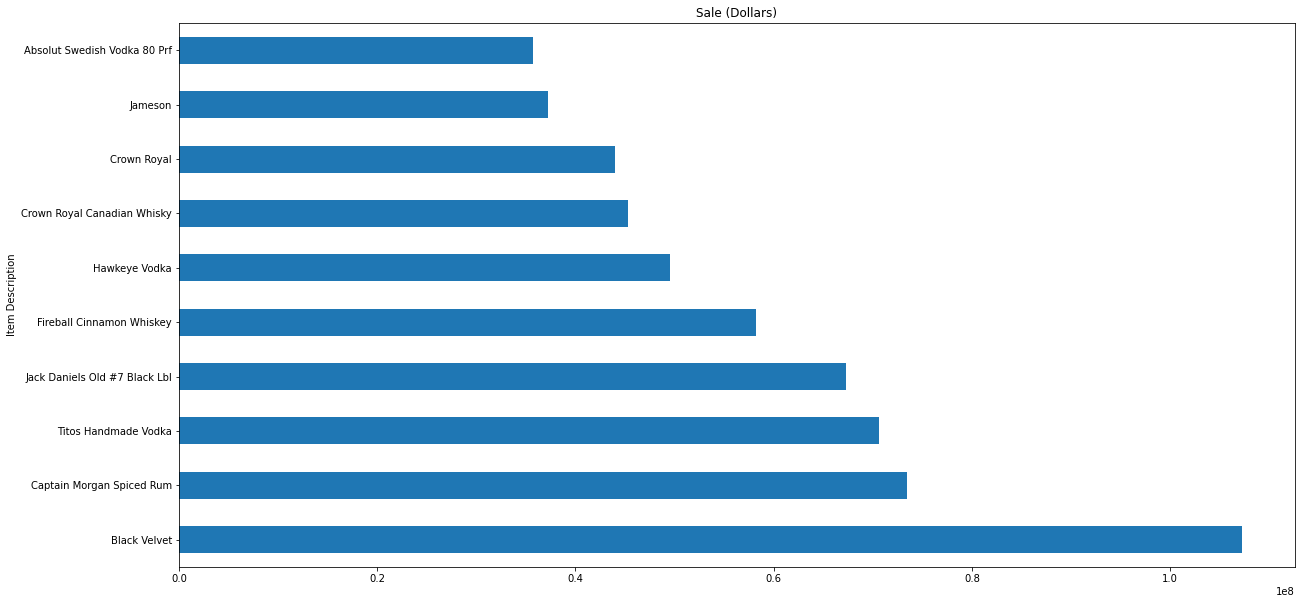

In [ ]:
ILS2.groupby('Item Description')['Sale (Dollars)'].sum().sort_values(ascending=False).head(10).plot(kind='barh', figsize=(20,10))
plt.title('Sale (Dollars)')
plt.show()

In [ ]:
ILS_cleaned['Invoice/Item Number'] = ILS_cleaned['Invoice/Item Number'].str.replace(r'\D', '')
ILS_cleaned['Zip Code'] = ILS_cleaned['Zip Code'].str.replace(r'-', '')

C:\Users\samar\AppData\Local\Temp/ipykernel_11600/1650728067.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  ILS_cleaned['Invoice/Item Number'] = ILS_cleaned['Invoice/Item Number'].str.replace(r'\D', '')
C:\Users\samar\AppData\Local\Temp/ipykernel_11600/1650728067.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ILS_cleaned['Invoice/Item Number'] = ILS_cleaned['Invoice/Item Number'].str.replace(r'\D', '')
C:\Users\samar\AppData\Local\Temp/ipykernel_11600/1650728067.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [ ]:
## Here we cleaned a few unwanted features from the datatset.

# ILS_cleaned.drop("Date", axis=1,inplace= True)
ILS_cleaned["Bottles_Sold"] = ILS_cleaned["Bottles Sold"]
ILS_cleaned.drop("Bottles Sold", axis=1)
ILS_cleaned.drop(ILS_cleaned.columns.difference(['Invoice/Item Number','Store Number','Zip Code','County Number', 'Bottles_Sold','Volume Sold (Liters)']), 1, inplace=True)
ILS_cleaned.dropna(inplace=True)
X = ILS_cleaned.drop("Bottles_Sold", axis=1)
y = ILS_cleaned.Bottles_Sold

C:\Users\samar\AppData\Local\Temp/ipykernel_11600/363546374.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ILS_cleaned["Bottles_Sold"] = ILS_cleaned["Bottles Sold"]
C:\Users\samar\AppData\Local\Temp/ipykernel_11600/363546374.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  ILS_cleaned.drop(ILS_cleaned.columns.difference(['Invoice/Item Number','Store Number','Zip Code','County Number', 'Bottles_Sold','Volume Sold (Liters)']), 1, inplace=True)
C:\Users\samar\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation:

In [ ]:
# The datasset is spilt into training and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [ ]:
#Defining Random Forest Regressor Model

model = HyperoptEstimator(
    regressor=random_forest_regression('reg')
    , preprocessing=any_preprocessing('pre')
    , algo=tpe.suggest
    , max_evals=50
    , trial_timeout=300
) 

In [ ]:
#perform the search
model.fit(X_train.values, y_train.values)

100%|██████████| 50/50 [00:02<00:00,  2.46s/trial, best loss: 0.1294366761043766]


C:\Users\samar\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


###### The Regression model took somewhere around 20 minutes runtime after reducing dataset.

In [ ]:
# Print R2 value
print(model.score(X_test, y_test))

0.4679651288127822


In [ ]:
#Identify Best Hyperparameters 
print(model.best_model())

{'learner': RandomForestRegressor(bootstrap=False, criterion='mse',
                      max_features=0.7164641620024368, n_estimators=38,
                      n_jobs=1, random_state=2, verbose=False), 'preprocs': (StandardScaler(with_mean=False, with_std=False),), 'ex_preprocs': ()}


In [ ]:
# Dump to PKL file 
joblib.dump(model, 'RF_model.pkl')

['RF_model.pkl']

In [ ]:
# Create XGBoost Model
estim = HyperoptEstimator(regressor=xgboost_regression('xgreg'),
                          preprocessing=any_preprocessing('pre'),
                          algo=tpe.suggest,
                          max_evals=50,
                          trial_timeout=300)




In [ ]:
estim.fit(X_train.values, y_train.values)

100%|██████████| 50/50 [00:33<00:00, 33.18s/trial, best loss: 0.11903526382112017]
[02:54:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


###### The XGBoost model took somewhere around 36 minutes runtime after reducing dataset.

In [ ]:
print(estim.score(X_test, y_test))

0.519491182176664


In [ ]:
## Best hyperparameters
print(estim.best_model())

{'learner': XGBRegressor(base_score=0.5, booster='gbtree',
             colsample_bylevel=0.6284668995003916, colsample_bynode=1,
             colsample_bytree=0.5643700430672974, enable_categorical=False,
             gamma=1.8864172587712815, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.46597411097238955,
             max_delta_step=0, max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=2000, n_jobs=12,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=3, reg_alpha=0.013679699757605409,
             reg_lambda=3.9327793005943206, scale_pos_weight=1, seed=3,
             subsample=0.7448698199545455, tree_method='exact',
             validate_parameters=1, verbosity=None), 'preprocs': (), 'ex_preprocs': ()}


In [ ]:
joblib.dump(estim, 'XGB_model.pkl')

['XGB_model.pkl']

In [ ]:
# Creating KNN Model
from sklearn.metrics import mean_absolute_error
knnmodel = HyperoptEstimator(regressor=knn_regression('knnreg'),
                          preprocessing=any_preprocessing('my_pre'),
                          algo=tpe.suggest,
                          max_evals=50,
                          trial_timeout=300,
                          loss_fn=mean_absolute_error)


In [ ]:
knnmodel.fit(X_train.values, y_train.values)

100%|██████████| 50/50 [00:02<00:00,  2.05s/trial, best loss: 1.9355248739864124]


###### The KNN model took somewhere around 30 seconds runtime after reducing dataset.

In [ ]:
print(knnmodel.score(X_test, y_test))

0.3749941519115422


In [ ]:
print(knnmodel.best_model())

{'learner': KNeighborsRegressor(metric='euclidean', n_jobs=1, n_neighbors=1), 'preprocs': (PCA(n_components=4, whiten=True),), 'ex_preprocs': ()}


In [ ]:
joblib.dump(knnmodel, 'KNN_model.pkl')

['KNN_model.pkl']

In [ ]:
knn_y_predict = knnmodel.predict(X_test)
xgb_y_predict = estim.predict(X_test)
rfr_y_predicts =  model.predict(X_test)

In [ ]:
# Regression Metrics 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


errors = mean_squared_error(y_test, knn_y_predict, squared=False)
r2 = r2_score(y_test,knn_y_predict)
# report error
print('MSE :',errors)
print("RMSE :",np.sqrt(mean_squared_error(y_test,knn_y_predict)))
print('R2 :',r2)

MSE : 57.32171740845732
RMSE : 57.32171740845732
R2 : 0.3749941519115422


In [ ]:
errors = mean_squared_error(y_test,xgb_y_predict , squared=False)
r2 = r2_score(y_test,xgb_y_predict)
# report error
print('MSE :',errors)
print("RMSE :",np.sqrt(mean_squared_error(y_test,xgb_y_predict)))
print('R2 :',r2)

MSE : 50.260619138697905
RMSE : 50.260619138697905
R2 : 0.519491182176664


In [ ]:
errors = mean_squared_error(y_test,rfr_y_predicts , squared=False)
r2 = r2_score(y_test,rfr_y_predicts)
# report error
print('MSE :',errors)
print("RMSE :",np.sqrt(mean_squared_error(y_test,rfr_y_predicts)))
print('R2 :',r2)

MSE : 52.886789312246506
RMSE : 52.886789312246506
R2 : 0.4679651288127822


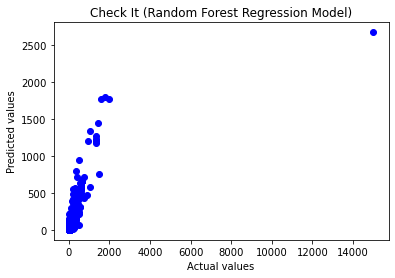

In [ ]:
## Visualizing Predicted vs Actual Values
plt.scatter(y_test, rfr_y_predicts, color = 'blue')
plt.title('Check It (Random Forest Regression Model)')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

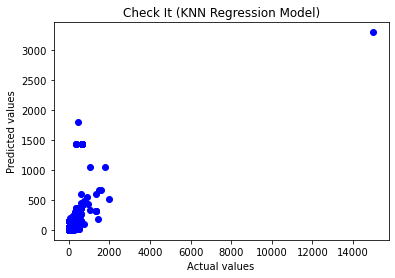

In [ ]:
plt.scatter(y_test, knn_y_predict, color = 'blue')
plt.title('Check It (KNN Regression Model)')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

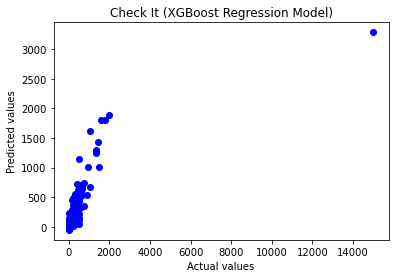

In [ ]:
plt.scatter(y_test, xgb_y_predict, color = 'blue')
plt.title('Check It (XGBoost Regression Model)')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

<AxesSubplot:xlabel='County Number'>

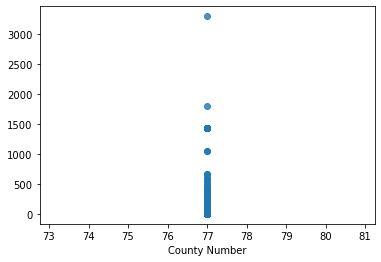

In [ ]:
### Visualze Sales Predictions for Different Counties
sns.regplot(x=X_test['County Number'], y=knn_y_predict)

<AxesSubplot:xlabel='County Number'>

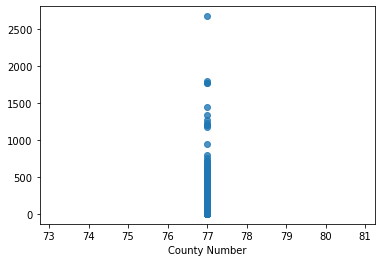

In [ ]:
sns.regplot(x=X_test['County Number'], y=rfr_y_predicts)

### Machine Learning Predictions & Outcomes 

As per the detailed evaluation metrics below, the three models, K Nearest Neighbour Regressor, XGBoost Regressor and Random Forest Regressor seem to perform identically. However, with reference to the most prominent evaluation metric, R squared, K Nearest Neightbour can be identified as the most appropriate model with the lowest R squared value of 0.37. 

##### Detailed Evaluation Metrics
<table>
<thead>
<tr>
<th> Model Name </th>
<th> MSE </th>
<th> RMSE </th>
<th> R2 </th>
</tr>
</thead>
<tbody>
<tr>
<td>K Nearest Neighbour Regressor </td>
<td>57.32</td>
<td>57.32</td>
<td>0.37</td>
</tr>
<tr>
<td>XGBoost Regressor </td>
<td>50.26</td>
<td>50.26</td>
<td>0.52</td>
</tr>
<tr>
<td>Random Forest Regressor </td>
<td>52.89</td>
<td>52.89</td>
<td>0.47</td>
</tr>
</tbody>
</table>

### Machine Learning Predictions & Outcomes (Full Dataset)

As per the detailed evaluation metrics below, the three models, the K Nearest Neighbour Regressor and the Random Forest Regressor is noticed to be underfitting, while the XGBoost Regressor seem to slightly overfit. However, with reference to the evaluation metrics, MSE and RMSE, XGBoost Regressor can be identified as the most appropriate model with the lowest MSE and RMSE values of 7.38.

##### Detailed Evaluation Metrics
<table>
<thead>
<tr>
<th> Model Name </th>
<th> MSE </th>
<th> RMSE </th>
<th> R2 </th>
</tr>
</thead>
<tbody>
<tr>
<td>K Nearest Neighbour Regressor </td>
<td>30.24</td>
<td>30.24</td>
<td>-0.64</td>
</tr>
<tr>
<td>XGBoost Regressor </td>
<td>7.38</td>
<td>7.38</td>
<td>0.90</td>
</tr>
<tr>
<td>Random Forest Regressor </td>
<td>171.79</td>
<td>171.79</td>
<td>-51.86</td>
</tr>
</tbody>
</table>

###Comparison in Full Dataset vs Polk Dataset

The full datsaset is underfitting with the models K Nearest Neighbour Regressor an Random Forest Regressor while slightly overfitting with XGBoost Regressor. On other other hand, the Polk dataset is slightly overfitting with the models K Nearest Neighbour Regressor, XGBoost Regressor and Random Forest Regressor. 

### Visualizations of Results

The below visualization indicates the fluctuation of sales for liquor over the years. Moreover, the liquor sales seems to have increased over the years with certain decreasements in specific years. 
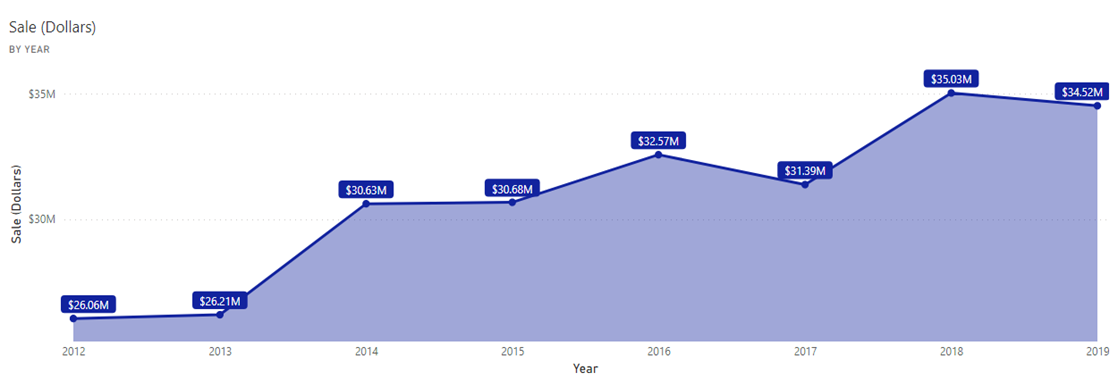

The below visualization indicates the daily liquor sales for the month of December over the years. The highest liquor sales is recorded in the period between 25th of December to 31st of December. However, fluctuations are noticed throughout the month. Thus, this assures the neccesity of a predictive model. 
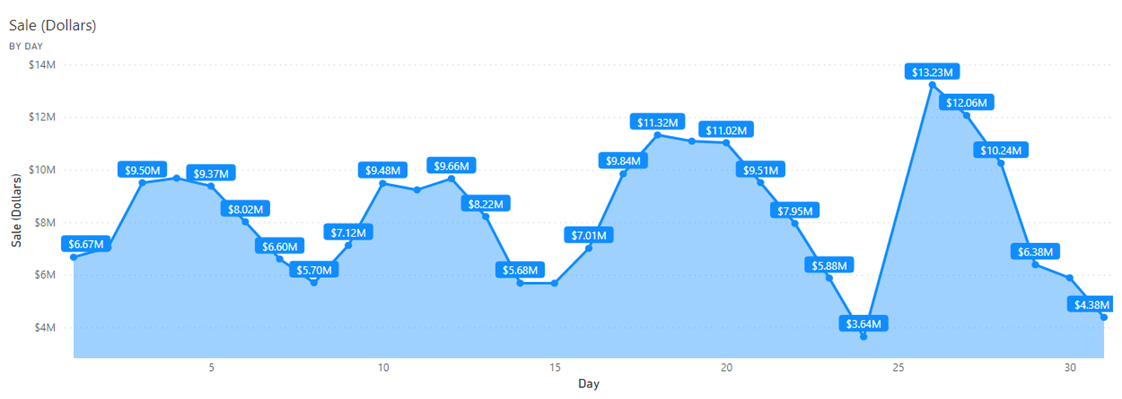

The below visualization indicates the top five counties that had generated the most liquor sales over the years. This finding helped to extract a subset of the data for the county 'Polk' which is the county with the most generated sales. 
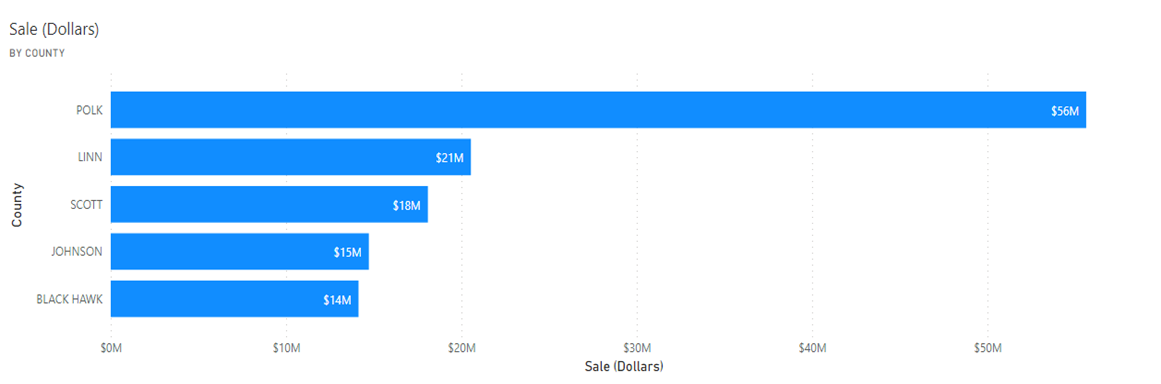

In addition to this the team worked in developing a Simple Web App, we could be deployed using a Web Deployment tool such as Heroku. Although the team was unable to complete the solution. A prototype of this Simple Web App has been included. The web was developed using the Streamlit framework and the source code for web app can be found in the Github reportsitory

https://github.com/ruwzeta/alcholsalespredictioniowa

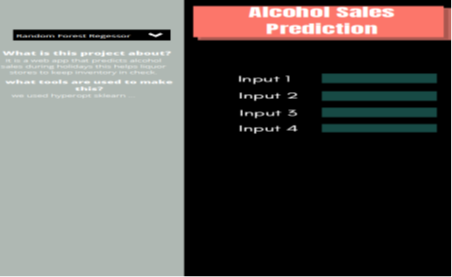

### Final Remarks from each Member 

#### Hettige Don Ruwindhu Dilanga Chandraratne - 
During this project, I was able to gain a good understanding on how Liquor Sales Predictions are made and which of the factors are key to determining correct predictions. In addition to this working in this project, made me and my team aware of the steps taken by data science and machine learning teams undergo to create succesful projects. 
Improvements to suggested : The team could have included some feature engineering such as normalize the data would have made the models much more accurate. 

#### Moonamalpe Thimantha Vidanagamage  - 
Engaging in this project with my colleagues aided me to gain exposure to the nature of a sales prediction solution along with its research related aspects. Moreover, I was able to learn and gain exposure in the implementation of an AutoML model (Hyperopt Sklearn) for a sales prediction requirement. In terms of improvements, I would prefer using a package such as SweetViz for faster and more insightful visualizations.On other hand, I personally believe that engaging more in data preparation tasks would improve the code and the predictive models further.  

#### Suheet Sonawane - 
During this project I got to explore a dataset and implement in such a way that we can forecast the sales for December Month. I also got to see my team-mates effort in extracting data and visualizing it which was a very good experience as it would really help me in the future.

Improvements- 
We could have worked more on the model and made it more sturdy to make it work for other types or data and for other months.


#### Samarpan Pandey - 
By working on the dataset of IOWA liquor sales we learned some techniques of data understanding of the liqour sales business.
Data Collection and analyzing data was also a requisite that we had to learn.
Gathering information obtained from the data set we were able to learn different market insights of liquor sales business and how we could look for patterns where we could extract our features for finding out which month had the most liquor sales and contributed most to the liquor sales business in the county.
We then extracted important features for our dataset and performed HyperOpt model training using different parameters, trial timeouts and different iterations. The model created was taking around 6 hours for runtime so we had to reduce the dataset and perform model testing with smaller dataset. The new model time was reduced to around 1 hour. For further model testing details please refer to the code.
Code can be further viewed by removing outliers, that is performing feature engineering on the dataset so we can have a better trained model in which we could train a bigger or different business data to gain forecasts for holiday season on the month of december.


#### Tirthesh Jani - 
This project helped me and my team to get an overview on different data aspects of not only Liquor stores but also other businesses. We learned about diverse topics like supply chain management, inventory management, demand forecasting etc. We also learned how machine learning and AI is implemented to businesses and how data scientists work to create and maintain effective projects. In the coding part of the things, we learned to work with Hyper opt sklearn which makes things a lot easier for students and programmers to generate machine learning models by automating most of the process. Improvements to suggest we could have cleaned the data a bit more and done feature engineering to improve accuracy.

### References 
* Arora, T., Chandna, R., Conant, S., Sadler, B., & Slater, R. (2020). Demand Forecasting In Wholesale Alcohol Distribution: An Ensemble Approach. SMU Data Science Review, 3(1). Retrieved 11 February 2022, from https://scholar.smu.edu/datasciencereview/vol3/iss1/7.

* By the numbers: How important is December for the liquor business?. (2019). [Blog]. Retrieved 11 February 2022, from https://liquorbarn.com/by-the-numbers-how-important-is-december-for-the-liquor-business/.

* Hirche, M., Haensch, J., & Lockshin, L. (2021). Comparing the day temperature and holiday effects on retail sales of alcoholic beverages – a time-series analysis. International Journal Of Wine Business Research, 33(3), 432-455. https://doi.org/10.1108/ijwbr-07-2020-0035
* Inventory Management using Machine Learning. (2020), V9(06). https://doi.org/10.17577/ijertv9is060661
* Kochak, A., & Sharma, S. (2015). DEMAND FORECASTING USING NEURAL NETWORK FOR SUPPLY CHAIN MANAGEMENT. Lijmerr. Retrieved 11 February 2022,.
* Hyperopt-Sk Learn Documentation - hyperopt-sklearn by hyperopt
* Analytics Vidya - Hyperopt - Alternative Hyperparameter Optimization Technique (analyticsvidhya.com)

